In [8]:
import numpy as np
from tensorflow import keras
from keras.datasets import fashion_mnist

In [9]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [10]:
print("Розмір тренувального датасету:", len(train_data))
print("Перший елемент тренувального датасету:", train_data[0])
print("Мітки тренувального датасету:", train_labels)
print("Значення міток: від", min(train_labels), "до", max(train_labels))
print("Розмір тестового датасету:", len(test_data))

Розмір тренувального датасету: 60000
Перший елемент тренувального датасету: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  

In [11]:
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


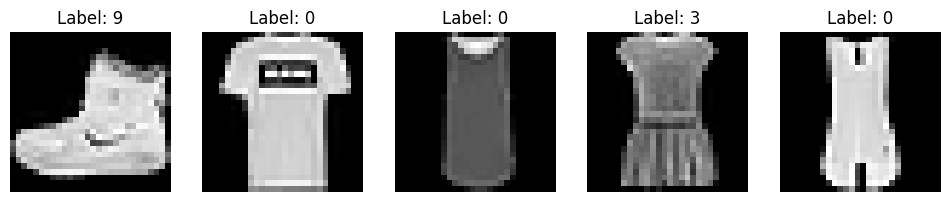

In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt

num_samples = 5
plt.figure(figsize=(12, 4))

for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(train_data[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')

plt.show()

In [13]:
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000, 
    formatter=dict(float=lambda x: "%.3g" % x))

print(train_data[1])

[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168 133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217 215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201 201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200 200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252 248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51  63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71  49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255 205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  17  12  13  70   

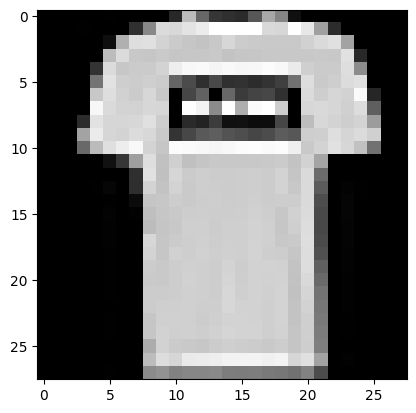

In [14]:
plt.imshow(train_data[1], cmap='gray')

In [15]:
from keras import layers
from keras import models
from keras.layers import PReLU

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="PReLU", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="PReLU"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="PReLU"),

    layers.Flatten(),
    layers.Dense(64, activation="PReLU"),
    layers.Dense(10, activation="softmax")
])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        21952     
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        26240     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          37504     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_data, train_labels, epochs=6, batch_size=256, validation_data=(test_data, test_labels))

Epoch 1/6
235/235 [==============================] - 37s 149ms/step - loss: 0.8864 - accuracy: 0.7711 - val_loss: 0.4783 - val_accuracy: 0.8288
Epoch 2/6
235/235 [==============================] - 35s 148ms/step - loss: 0.3927 - accuracy: 0.8602 - val_loss: 0.3827 - val_accuracy: 0.8653
Epoch 3/6
235/235 [==============================] - 35s 147ms/step - loss: 0.3341 - accuracy: 0.8794 - val_loss: 0.3676 - val_accuracy: 0.8669
Epoch 4/6
235/235 [==============================] - 36s 154ms/step - loss: 0.2964 - accuracy: 0.8939 - val_loss: 0.3534 - val_accuracy: 0.8754
Epoch 5/6
235/235 [==============================] - 38s 160ms/step - loss: 0.2730 - accuracy: 0.9003 - val_loss: 0.3201 - val_accuracy: 0.8837
Epoch 6/6
235/235 [==============================] - 37s 160ms/step - loss: 0.2508 - accuracy: 0.9090 - val_loss: 0.3362 - val_accuracy: 0.8793


In [18]:
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f"Test Accuracy: {test_accuracy}")

313/313 [==============================] - 3s 9ms/step - loss: 0.3362 - accuracy: 0.8793
Test Accuracy: 0.8792999982833862


In [19]:
def history_visual(history):    
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']

    epochs = range(1, len(history_dict['accuracy']) + 1)

    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.clf()
    val_acc_values = history_dict['val_accuracy']
    plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
    plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

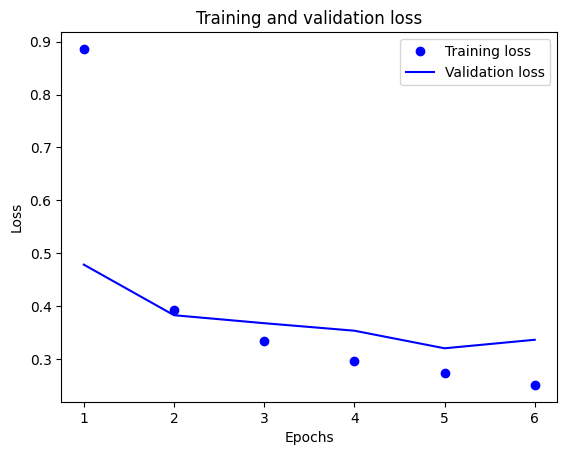

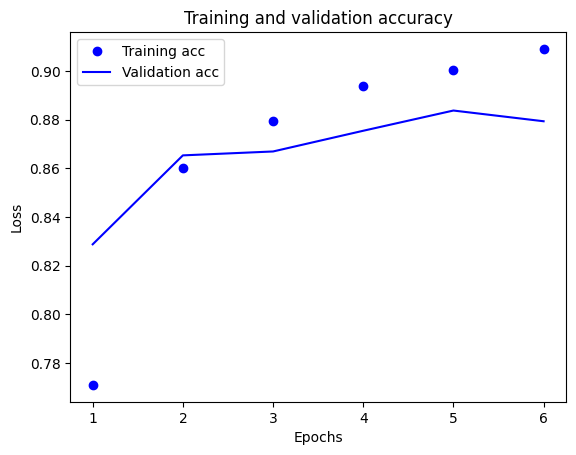

In [20]:
history_visual(history)

Висновок №1
Побудована модель показала гарні результати на навчальній вибірці: точність нейромережі становить приблизно 98%. На валідаційних даних результати дещо гірші: максимальна точність склала приблизно 91%. У порівнянні з найкращою моделлю, побудованою у домашньому завданні №9, згорткова нейромережа показала кращі результати.

Порівняльна таблиця двох нейромереж
Параметр                       	Нейромережа ДЗ №9  	Нейромережа ДЗ №10
Кількість шарі                          в	                  3	8
Функція активац                      ії	PRe              LU	PReLU
Кількість е                          пох              	50	6
Розмір б                          атчу              	250	256
Оптимі                              Adтор              	Adam	Adam
То                              чніс              ть	91%	98%
Точність на валідаційни          х да              них	90%	91%

Частина №2:

In [1]:
from tensorflow.keras.applications import VGG16

vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
vgg16_base.trainable = False

vgg16_base.summary()




Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0  

In [2]:
from keras import layers
from keras import models
from keras.layers import PReLU

model1 = models.Sequential([
    vgg16_base,
    layers.Flatten(),
    layers.Dense(32, activation="PReLU"),
    layers.Dense(10, activation="softmax")
])
                                                  
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 32)                16448     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 14731466 (56.20 MB)
Trainable params: 16778 (65.54 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [3]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
import numpy as np
from tensorflow.keras.applications import VGG16
from keras import layers
from keras import models
from keras.layers import PReLU
from keras.datasets import fashion_mnist
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image

def resize_image(image, target_size=(32, 32)):
    image = Image.fromarray(image)
    image = image.resize(target_size)
    return np.array(image)

def preprocess_image(image):
    image = image / 255.0  
    return image


(train_data1, train_labels1), (test_data1, test_labels1) = fashion_mnist.load_data()

train_data1, test_data1 = train_data1 / 255., test_data1 / 255.

resized_train_data = np.array([resize_image(img) for img in train_data1])
resized_test_data = np.array([resize_image(img) for img in test_data1])

# Перевірка розмірів після зміни
print(resized_train_data.shape)
print(resized_test_data.shape)

(60000, 32, 32)
(10000, 32, 32)


In [5]:
resized_train_data = np.expand_dims(resized_train_data, axis=-1)
resized_train_data = np.repeat(resized_train_data, 3, axis=-1)
resized_test_data = np.expand_dims(resized_test_data, axis=-1)
resized_test_data = np.repeat(resized_test_data, 3, axis=-1)

print(resized_train_data.shape)
print(resized_test_data.shape)


(60000, 32, 32, 3)
(10000, 32, 32, 3)


In [6]:
history1 = model1.fit(
    resized_train_data,
    train_labels1, 
    epochs=5,
    batch_size=64,  
    validation_data=(resized_test_data, test_labels1)
)

Epoch 1/5


938/938 [==============================] - 487s 516ms/step - loss: 0.6743 - accuracy: 0.7722 - val_loss: 0.4854 - val_accuracy: 0.8250
Epoch 2/5
938/938 [==============================] - 486s 518ms/step - loss: 0.4466 - accuracy: 0.8386 - val_loss: 0.4370 - val_accuracy: 0.8438
Epoch 3/5
938/938 [==============================] - 495s 528ms/step - loss: 0.4121 - accuracy: 0.8507 - val_loss: 0.4186 - val_accuracy: 0.8480
Epoch 4/5
938/938 [==============================] - 500s 534ms/step - loss: 0.3919 - accuracy: 0.8586 - val_loss: 0.4122 - val_accuracy: 0.8507
Epoch 5/5
938/938 [==============================] - 436s 465ms/step - loss: 0.3789 - accuracy: 0.8617 - val_loss: 0.4041 - val_accuracy: 0.8549


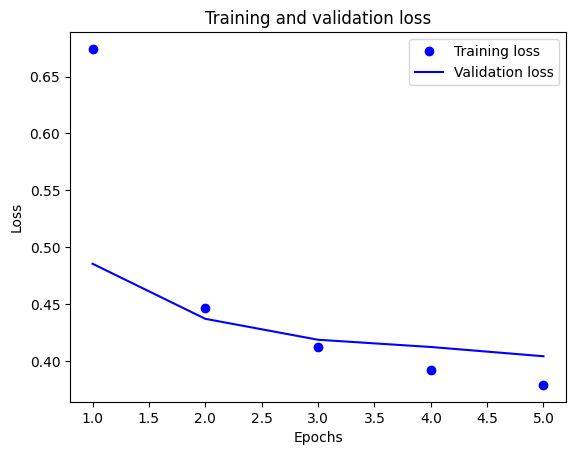

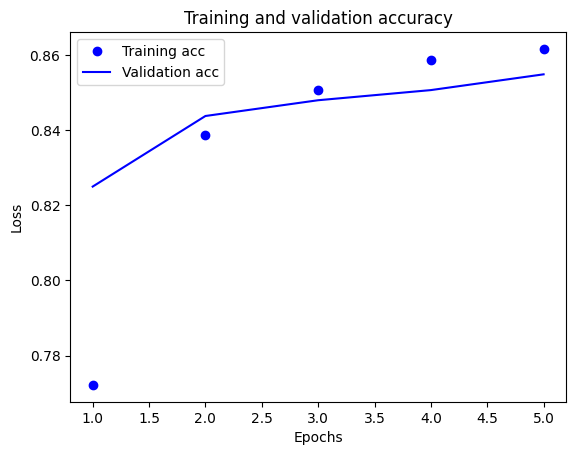

In [21]:
import matplotlib.pyplot as plt

history_visual(history1)

Висновок №2
Побудована модель з використанням VGG16 показала непогані результати на навчальній вибірці: точність нейромережі становить приблизно 90%. На валідаційних даних максимальна точність склала 90%. Ці результати схожі з тими, які було отримано у домашньому завданні №9, але гірші за отримані у першій частині завдання №10. Можливо потрібно було більше епох для якісного навчання моделі з використанням VGG16, але воно проходило досить довго, тому зупинемося на досягнутих результатах.